* 데이터출처 : 서울 열린데이터광장

* 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보 : http://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do
* 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보 :http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [3]:
raw = pd.read_csv("data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding="cp949")
raw.shape

(45945, 52)

In [4]:
raw.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202107,1호선,동대문,665,13,13154,2112,8755,6552,13558,...,7234,7,1394,0,0,0,1,0,0,20210803
1,202107,1호선,동묘앞,92,0,3197,1077,3575,4910,5452,...,1955,3,1039,0,0,0,0,0,0,20210803
2,202107,1호선,서울역,654,6,8652,6342,11542,33836,34033,...,5824,29,551,0,0,0,0,0,0,20210803
3,202107,1호선,시청,13,0,1803,4616,2797,19665,6210,...,988,6,84,0,0,0,0,0,0,20210803
4,202107,1호선,신설동,295,14,7940,3120,7834,10994,15927,...,4104,21,437,1,0,0,0,0,0,20210803


In [5]:
raw.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
45940,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
45941,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
45942,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
45943,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
45944,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45945 entries, 0 to 45944
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           45945 non-null  int64 
 1   호선명           45945 non-null  object
 2   지하철역          45945 non-null  object
 3   04시-05시 승차인원  45945 non-null  int64 
 4   04시-05시 하차인원  45945 non-null  int64 
 5   05시-06시 승차인원  45945 non-null  int64 
 6   05시-06시 하차인원  45945 non-null  int64 
 7   06시-07시 승차인원  45945 non-null  int64 
 8   06시-07시 하차인원  45945 non-null  int64 
 9   07시-08시 승차인원  45945 non-null  int64 
 10  07시-08시 하차인원  45945 non-null  int64 
 11  08시-09시 승차인원  45945 non-null  int64 
 12  08시-09시 하차인원  45945 non-null  int64 
 13  09시-10시 승차인원  45945 non-null  int64 
 14  09시-10시 하차인원  45945 non-null  int64 
 15  10시-11시 승차인원  45945 non-null  int64 
 16  10시-11시 하차인원  45945 non-null  int64 
 17  11시-12시 승차인원  45945 non-null  int64 
 18  11시-12시 하차인원  45945 non-null  int64 
 19  12시-

## tidy data
* melt

In [7]:
df = raw.melt(id_vars=["사용월", "호선명", "지하철역"], var_name="시간승하차", value_name="인원수")
df.head()

,사용월,호선명,지하철역,시간승하차,인원수
0,202107,1호선,동대문,04시-05시 승차인원,665
1,202107,1호선,동묘앞,04시-05시 승차인원,92
2,202107,1호선,서울역,04시-05시 승차인원,654
3,202107,1호선,시청,04시-05시 승차인원,13
4,202107,1호선,신설동,04시-05시 승차인원,295


In [8]:
df["호선명"].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

In [9]:
df["시간승하차"].unique()

array(['04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원',
       '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원',
       '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원',
       '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원',
       '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원',
       '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원',
       '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원',
       '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원',
       '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원',
       '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원',
       '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원',
       '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원',
       '작업일자'], dtype=object)

In [10]:
print(df.shape)
df = df[df["시간승하차"] != "작업일자"].copy()
print(df.shape)

(2251305, 5)
(2205360, 5)


## 문자열 나누기

In [11]:
df["시간"] = df["시간승하차"].str.split(expand=True)[0]
df["승하차"] = df["시간승하차"].str.split(expand=True)[1]
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차인원


In [12]:
df["승하차"] = df["승하차"].str.replace("인원", "")
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차


In [13]:
df["연도"] = df["사용월"].astype(str).str[:4]
df["월"] = df["사용월"].astype(str).str[4:]
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,연도,월
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차,2021,07


## 월별 승하차 인원

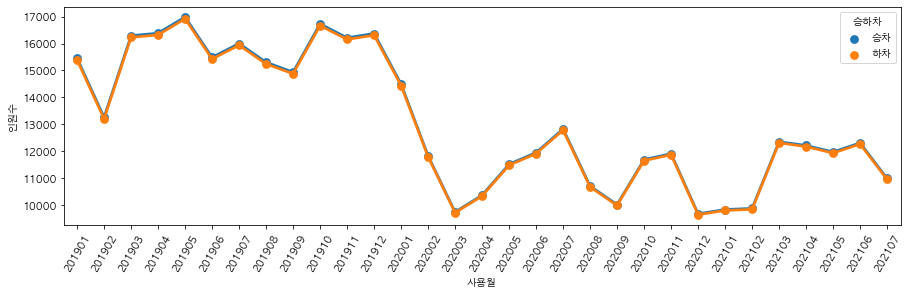

In [14]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df[df["사용월"] > 201812], x="사용월", y="인원수", hue="승하차", ci=None)

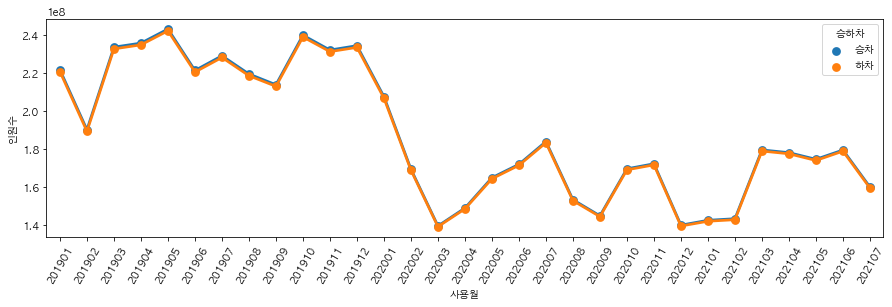

In [15]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df[df["사용월"] > 201812], x="사용월", y="인원수", hue="승하차", ci=None, estimator=np.sum)

In [16]:
df[df["사용월"] > 201812].groupby(["사용월", "호선명"])["인원수"].sum().unstack()

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,9호선2~3단계,...,경춘선,공항철도 1호선,과천선,분당선,수인선,안산선,우이신설선,일산선,장항선,중앙선
사용월,,,,,,,,,,,,,,,,,,,,,
201901,17016305,94349778,34190352,34259336,36366162,20682364,42553968,11493108,16762623,4546608,...,2092650,6606287,6523038,22782251,2608173,7418590,2484576,6638377,804440,5516586
201902,14589296,79855160,29345628,29576287,30695651,17689191,36259889,9785599,14266703,3873496,...,1889164,5862755,5519288,19284653,2253267,6521657,2164689,5766711,733727,4839799
201903,17234678,96712070,35506974,36826458,37460842,22456855,44592243,12010317,17137852,4793826,...,2427095,6867931,6866303,23755740,2918703,8253265,2759556,6950965,1056527,6174361
201904,17061583,96823209,35651141,36737164,38715447,22377541,45430945,12270104,17813631,4968118,...,2496676,6905971,7209590,23882672,2984438,8415178,2761892,7077438,1044054,6306487
201905,17588961,99475298,36725082,37996878,39286800,23261489,46771259,12502268,17701747,5217338,...,2698566,7180561,7417287,24743192,3161129,8736634,2881513,7510792,1091956,6627886
201906,16171921,91184858,33513920,34611821,35603933,21002027,42086126,11337937,16375819,4852108,...,2424040,6828961,6776284,22560612,2824545,7824463,2612615,6690424,922417,5955075
201907,16660234,97113569,35008253,35163719,37477610,21352993,43631191,11820286,17426490,5410604,...,2393620,7146296,6760126,23572022,2786271,7703847,2643447,6951755,805556,5970734
201908,16290500,92444213,33770338,33715534,35690331,20379105,41302496,11129175,16621093,5193169,...,2433192,7192796,6477878,22357509,2644881,7411028,2519532,6756810,802024,5771528
201909,15487581,87149288,32642520,33114287,34360740,20400080,40771235,10858587,15887576,4757658,...,2295862,6580700,6310292,21825572,2735994,7626633,2576857,6550206,959305,5805335
